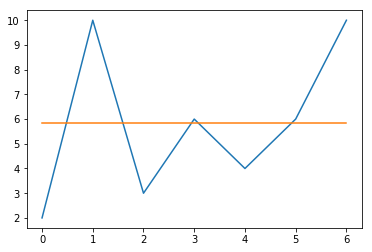

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config INlineBackend.figure_format = 'svg'

def mean (sampleset):
        total = 0
        for element in sampleset:
            total = total + element
        return total/len(sampleset)

myset = [2., 10., 3., 6., 4., 6., 10.]
mymean = mean (myset)
plt.plot (myset)
plt.plot ([mymean] * 7)

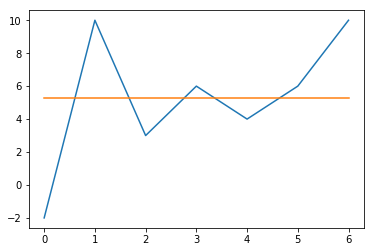

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config INlineBackend.figure_format = 'svg'

def mean (sampleset):
        total = 0
        for element in sampleset:
            total = total + element
        return total/len(sampleset)

myset = [-2., 10., 3., 6., 4., 6., 10.]
mymean = mean (myset)
plt.plot (myset)
plt.plot ([mymean] * 7)

variance of set 1: 27.06122448979591
deviation of set 1: 5.2020404160094635


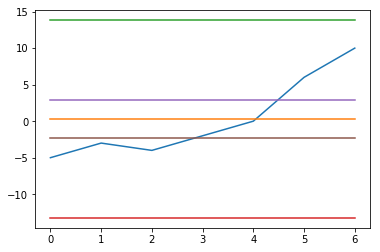

In [17]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
%config INlineBackend.figure_format = 'svg'

def mean (sampleset):
        total = 0
        for element in sampleset:
            total = total + element
        return total/len(sampleset)

def variance (sampleset):
        total = 0
        sampleset_mean = mean(sampleset)
        for element in sampleset:
            total = total + (math.pow (element - sampleset_mean, 2)) 
        return total/len(sampleset)
    
myset1 = [-5., -3., -4., -2., 0., 6., 10.]
mymean1 = mean (myset1)
myvar1 = variance(myset1)
mydeviation1 = math.sqrt(variance(myset1))

plt.plot (myset1)
plt.plot ([mymean1] * 7)
plt.plot ([mymean1 + myvar1/2] * 7)
plt.plot ([mymean1 - myvar1/2] * 7)
plt.plot ([mymean1 + mydeviation1/2] * 7)
plt.plot ([mymean1 - mydeviation1/2] * 7)
print ("variance of set 1: " + str(myvar1))
print ("deviation of set 1: " + str(mydeviation1))

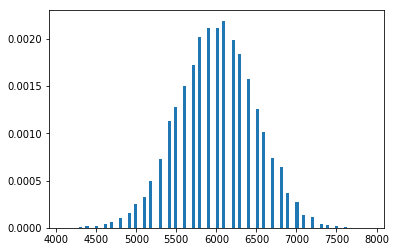

In [28]:
import numpy as np

plt.figure ()
distrib = np.random.binomial (100, 0.6, 10000) * 100
plt.hist (distrib, 100, normed = 1)
plt.show()

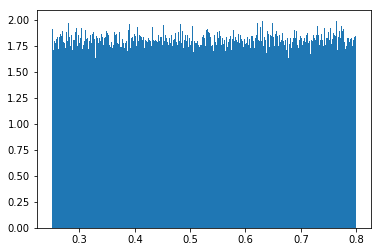

In [48]:
import numpy as np

plt.figure ()
uniform_low = 0.25
unfiorm_high = 0.8
uniform = np.random.uniform (uniform_low, unfiorm_high, 1000000)
plt.hist (uniform, 1000, normed = 1)
plt.show()

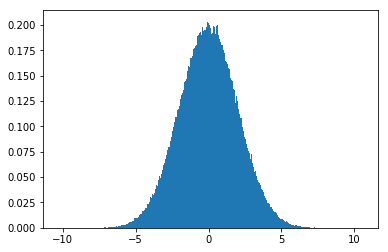

In [46]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 2
plt.figure ()
distrib = np.random.normal (mu, sigma, 1000000)
plt.hist (distrib, 1000, normed  = True)
plt.show()

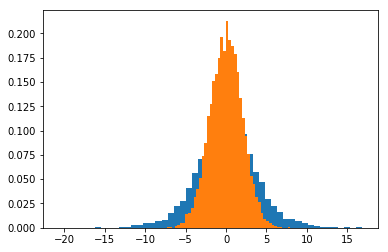

In [51]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 2
logDistrib = np.random.logistic(mu, sigma, 10000)
plt.hist (logDistrib, 50, normed  = True)
normDistrib = np.random.normal (mu, sigma, 10000)
plt.hist (normDistrib, 50, normed  = True)
plt.show()

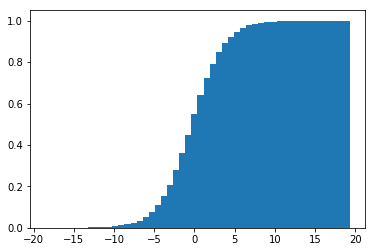

In [52]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 2
logDistrib = np.random.logistic(mu, sigma, 10000)
plt.hist (logDistrib, 50, normed = 1, cumulative = True)
plt.show()

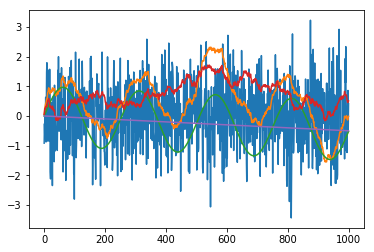

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config INlineBackend.figure_format = 'svg'

def genSeasonality (N):
    ix = np.arange(N)
    signal = np.sin(2*np.pi*ix/float(N/4))
    return signal

def genRandomWalk (N):
    whitenoise = np.random.normal(0,1,N)
    result = [0] * N
    result[0] = whitenoise[0]
    for i in range(1, N):
        result[i] = result[i-1] + whitenoise[i]
    return result

def combine (x,y,z, a, b, c):
    l = min ([len(x), len(y), len(z)])
    result = [0] * l
    for i in range(0, l):
        result[i] = a* x[i] + b * y[i]+ c * z[i]
    return result

def genTrend(N, m, b):
    result = [0] * N
    for i in range(0, N):
        result[i] = m * i + b
    return result

noise = genRandomWalk(1000)
season = genSeasonality(1000);
trend = genTrend(1000, -0.0005, 0);
whitenoise = np.random.normal(0,1, 1000)
timeSeries = combine(season, noise, trend, 1, 0.05, 1)
plt.plot(whitenoise)
plt.plot(timeSeries)
plt.plot(combine(season, noise, trend, 1, 0, 1))
plt.plot(combine(season, noise, trend, 0,  0.05, 0))
plt.plot(trend)

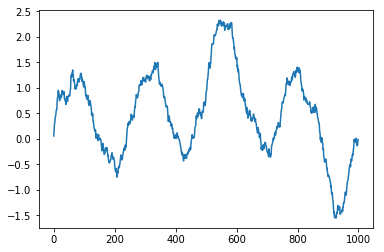

In [3]:
import csv

csvfile = "C:/Users/TobiasSchmidt/Desktop/IBM/PE_4/SystemML/dml_test_scripts/pythondump.csv"

plt.plot(timeSeries)

with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in timeSeries:
        writer.writerow([val])    

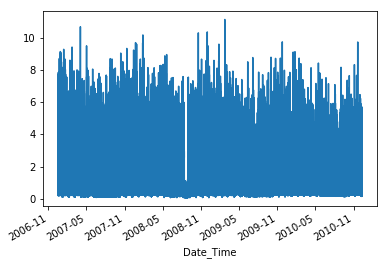

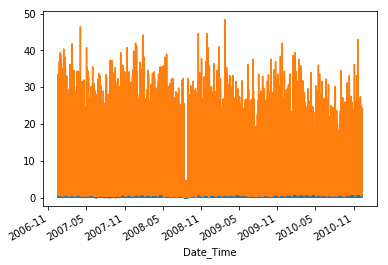

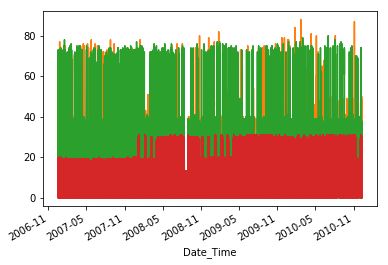

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config INlineBackend.figure_format = 'svg'

dmlfolder = "C:/Users/TobiasSchmidt/Desktop/IBM/PE_4/SystemML/dml_test_scripts/"
householdFilePath = dmlfolder + "household_power_consumption.csv"

df = pd.read_csv(householdFilePath, 
                 sep = ";", na_values=["?"],
                 engine = "c",
                 #nrows = 100000,
                 usecols=["Date", "Time", "Global_active_power","Global_reactive_power","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"],
                 #usecols=["Date", "Time", "Global_active_power"],
                 low_memory = False,
                 memory_map = True,
                 parse_dates=[["Date", "Time"]],
                index_col=[0])

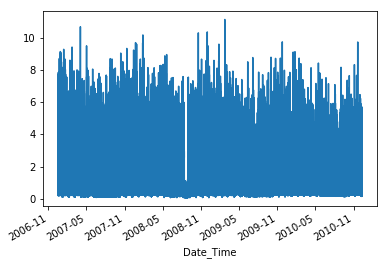

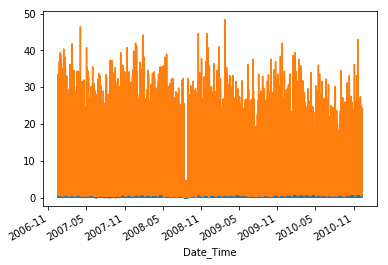

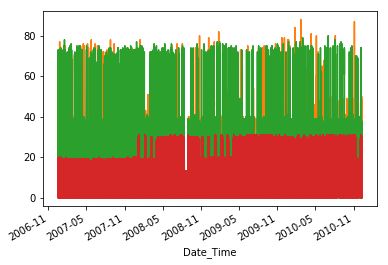

In [251]:
fig = plt.figure()
df["Global_active_power"].plot()
plt.savefig(dmlfolder + "householdplot_active.png", format ="png", dpi = 300)

fig = plt.figure()
df["Global_active_power"].plot()
df["Global_intensity"].plot()
plt.savefig(dmlfolder + "householdplot_gobal_and_ative.png", format ="png", dpi = 300)


fig = plt.figure()
df["Global_active_power"].plot()
df["Sub_metering_1"].plot()
df["Sub_metering_2"].plot()
df["Sub_metering_3"].plot()
plt.savefig(dmlfolder + "householdplot_Sub_metering_and_ative.png", format ="png", dpi = 300)

In [253]:
df

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,
2006-12-16 17:24:00,4.216,0.418,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,15.8,0.0,1.0,17.0


In [284]:
hourly = df.resample('1H').mean()
hourly.interpolate(method='spline', order=2)
hourly

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,18.100000,0.000000,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,15.600000,0.000000,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,14.503333,0.000000,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,13.916667,0.000000,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,13.046667,0.000000,0.416667,17.216667
2006-12-16 22:00:00,2.200133,0.056167,9.523333,0.000000,0.133333,4.433333
2006-12-16 23:00:00,2.061600,0.071433,8.896667,0.000000,0.083333,0.000000
2006-12-17 00:00:00,1.882467,0.102433,8.126667,0.000000,0.466667,0.000000
2006-12-17 01:00:00,3.349400,0.136933,14.246667,0.000000,25.233333,0.000000


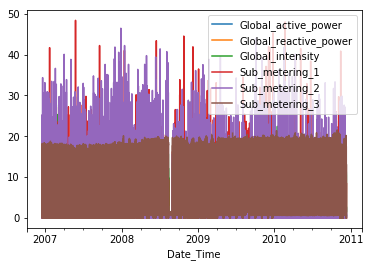

In [292]:
hourly.plot()

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config INlineBackend.figure_format = 'svg'

dmlfolder = "C:/Users/TobiasSchmidt/Desktop/IBM/PE_4/SystemML/dml_test_scripts/"
householdFilePath = dmlfolder + "hourly_household_power.csv"

hourly = pd.read_csv(householdFilePath, 
                 sep = ";",
                 #nrows = 100000,
                 usecols=["Date_Time", "Global_active_power","Global_reactive_power","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"],
                 #usecols=["Date", "Time", "Global_active_power"],
                 parse_dates=["Date_Time"],
                index_col=[0])
hourly

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,18.100000,0.000000,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,15.600000,0.000000,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,14.503333,0.000000,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,13.916667,0.000000,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,13.046667,0.000000,0.416667,17.216667
2006-12-16 22:00:00,2.200133,0.056167,9.523333,0.000000,0.133333,4.433333
2006-12-16 23:00:00,2.061600,0.071433,8.896667,0.000000,0.083333,0.000000
2006-12-17 00:00:00,1.882467,0.102433,8.126667,0.000000,0.466667,0.000000
2006-12-17 01:00:00,3.349400,0.136933,14.246667,0.000000,25.233333,0.000000


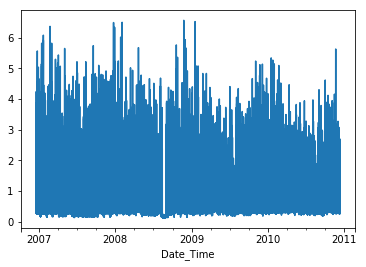

In [293]:
hourly["Global_active_power"].plot()

In [263]:
hourly.to_csv(dmlfolder + "hourly_household_power.csv", sep=';', encoding='utf-8')

C:\Users\TobiasSchmidt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called to_csv(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


In [283]:
daily = df.resample('D').mean()
daily

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,
2006-12-16,3.053475,0.088187,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,6.467361,0.000000,1.838889,9.765972
2006-12-21,1.193758,0.100255,5.033797,1.227399,1.824061,7.246871
2006-12-22,1.625929,0.129796,6.872917,2.188194,0.243056,7.729861
2006-12-23,3.314851,0.153799,14.028056,1.853472,0.295139,10.226389
2006-12-24,1.770842,0.104097,7.640417,1.182639,3.529167,4.785417


In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config INlineBackend.figure_format = 'svg'

dmlfolder = "C:/Users/TobiasSchmidt/Desktop/IBM/PE_4/SystemML/dml_test_scripts/"
householdFilePath = dmlfolder + "daily_household_power.csv"

daily = pd.read_csv(householdFilePath, 
                 sep = ";",
                 #nrows = 100000,
                 usecols=["Date_Time", "Global_active_power","Global_reactive_power","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"],
                 #usecols=["Date", "Time", "Global_active_power"],
                 parse_dates=["Date_Time"],
                index_col=[0])
daily

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,
2006-12-16,3.053475,0.088187,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,6.467361,0.000000,1.838889,9.765972
2006-12-21,1.193758,0.100255,5.033797,1.227399,1.824061,7.246871
2006-12-22,1.625929,0.129796,6.872917,2.188194,0.243056,7.729861
2006-12-23,3.314851,0.153799,14.028056,1.853472,0.295139,10.226389
2006-12-24,1.770842,0.104097,7.640417,1.182639,3.529167,4.785417


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012B30F02B70>,
      dtype=object)

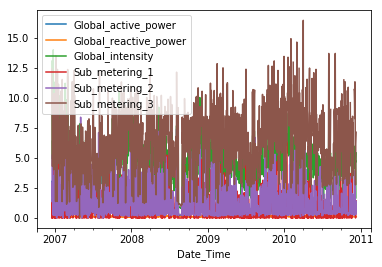

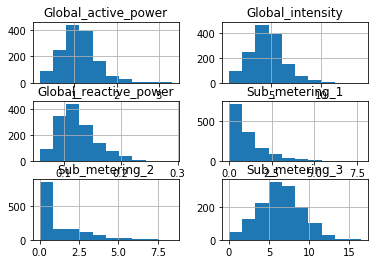

In [313]:
fig = plt.figure()
daily.plot()
fig = plt.figure()
daily.hist()

In [314]:
daily.to_csv(dmlfolder + "daily_household_power.csv", sep=';', encoding='utf-8')

In [282]:
weekly = df.resample('W').mean ()
weekly

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,
2006-12-17,2.505248,0.142118,10.664161,1.107298,2.577887,9.949346
2006-12-24,1.734186,0.116707,7.341973,1.110339,2.118575,7.684759
2006-12-31,1.958376,0.144109,8.238043,1.412681,2.245287,6.671661
2007-01-07,1.152170,0.109718,4.885524,1.068856,0.860105,6.093263
2007-01-14,1.422602,0.146245,6.068642,2.438457,1.494035,6.925731
2007-01-21,1.639451,0.136597,6.968413,2.324901,1.991567,8.086508
2007-01-28,1.517470,0.106522,6.397440,1.138506,1.482588,7.149717
2007-02-04,1.137664,0.113477,4.792143,0.396925,0.960516,7.437004
2007-02-11,0.970162,0.112586,4.189187,1.085813,1.961806,5.512599


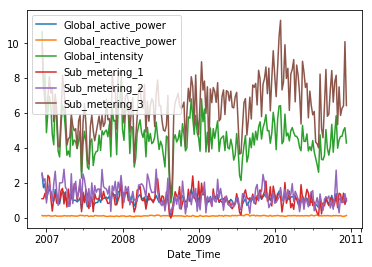

In [285]:
weekly.plot()

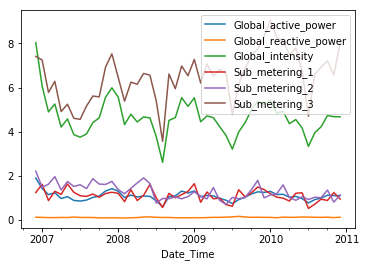

In [291]:
monthly = df.resample('M').mean ()
plt.figure();
monthly.plot()

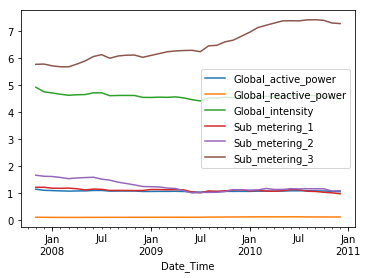

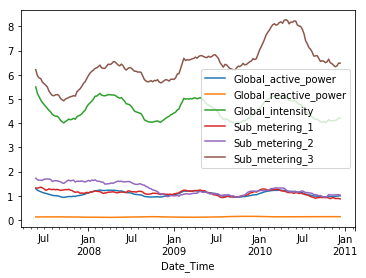

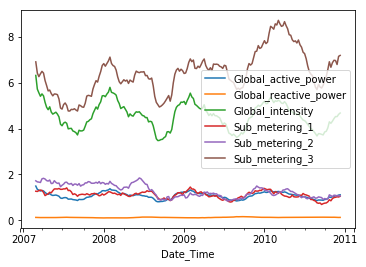

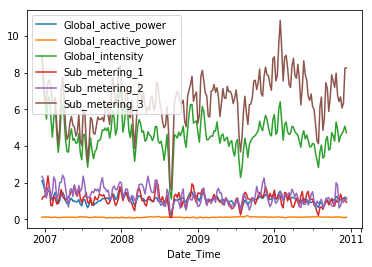

In [303]:
monthly_moving_average = monthly.rolling(12).mean()
plt.figure()
monthly_moving_average.plot()

weekly_moving_average = weekly.rolling(24).mean()
plt.figure()
weekly_moving_average.plot()

weekly_moving_average = weekly.rolling(12).mean()
plt.figure()
weekly_moving_average.plot()

weekly_moving_average = weekly.rolling(2).mean()
plt.figure()
weekly_moving_average.plot()

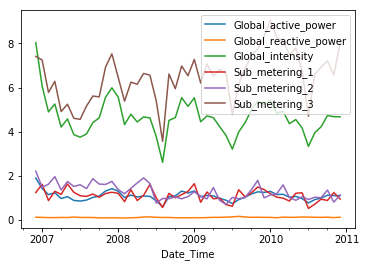

In [335]:
biweekly = df.resample('M').mean ()

#Global_active_power	Global_reactive_power	Global_intensity	Sub_metering_1	Sub_metering_2	Sub_metering_3
#biweekly = biweekly.filter(items=['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Global_reactive_power', ])
biweekly.plot()
biweekly["Global_active_power"].to_csv(dmlfolder + "monthly_Global_active_power.csv", index = False, sep=';', encoding='utf-8')
biweekly["Sub_metering_1"].to_csv(dmlfolder + "monthly_Sub_metering_1.csv", index = False, sep=';', encoding='utf-8')
biweekly["Sub_metering_2"].to_csv(dmlfolder + "monthly_Sub_metering_2.csv", index = False, sep=';', encoding='utf-8')
biweekly["Sub_metering_3"].to_csv(dmlfolder + "monthly_Sub_metering_3.csv", index = False, sep=';', encoding='utf-8')
biweekly["Global_reactive_power"].to_csv(dmlfolder + "monthly_Global_reactive_power.csv", index = False, sep=';', encoding='utf-8')
biweekly["Global_intensity"].to_csv(dmlfolder + "monthly_Global_intensity.csv", index = False, sep=';', encoding='utf-8')